<a href="https://colab.research.google.com/github/nicktho16/CS420Assignments/blob/main/FrozenLake_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [2]:
# Initialize FrozenLake environment
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True, render_mode=None)
n_actions = env.action_space.n
n_states = env.observation_space.n

In [3]:
def print_frozen_lake_layout(env):
    desc = env.unwrapped.desc.astype(str)
    size = desc.shape[0]

    for i in range(size):
        row = ""
        for j in range(size):
            cell = f" {desc[i][j]} "
            row += f"|{cell}"
        row += "|"
        print(row)
        print("-" * len(row))
print_frozen_lake_layout(env)

| S | F | F | F |
-----------------
| F | H | F | H |
-----------------
| F | F | F | H |
-----------------
| H | F | F | G |
-----------------


In [4]:
alpha = 0.1
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.9995
epsilon_min = 0.05
num_episodes = 10000


In [5]:
# Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Store rewards per episode
rewards_per_episode_Q = []

# Q-learning loop
for episode in range(num_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state, :])  # Exploit

        next_state, reward, done, truncated, _ = env.step(action)

        # Update Q-value
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))

        state = next_state
        total_reward += reward

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    rewards_per_episode_Q.append(total_reward)

    if (episode + 1) % 500 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Epsilon: {epsilon:.4f}, Avg Reward: {np.mean(rewards_per_episode_Q[-100:]):.2f}")


Episode 500/10000, Epsilon: 0.7788, Avg Reward: 0.01
Episode 1000/10000, Epsilon: 0.6065, Avg Reward: 0.02
Episode 1500/10000, Epsilon: 0.4723, Avg Reward: 0.06
Episode 2000/10000, Epsilon: 0.3678, Avg Reward: 0.10
Episode 2500/10000, Epsilon: 0.2864, Avg Reward: 0.13
Episode 3000/10000, Epsilon: 0.2230, Avg Reward: 0.15
Episode 3500/10000, Epsilon: 0.1737, Avg Reward: 0.29
Episode 4000/10000, Epsilon: 0.1353, Avg Reward: 0.31
Episode 4500/10000, Epsilon: 0.1053, Avg Reward: 0.21
Episode 5000/10000, Epsilon: 0.0820, Avg Reward: 0.33
Episode 5500/10000, Epsilon: 0.0639, Avg Reward: 0.55
Episode 6000/10000, Epsilon: 0.0500, Avg Reward: 0.44
Episode 6500/10000, Epsilon: 0.0500, Avg Reward: 0.46
Episode 7000/10000, Epsilon: 0.0500, Avg Reward: 0.48
Episode 7500/10000, Epsilon: 0.0500, Avg Reward: 0.47
Episode 8000/10000, Epsilon: 0.0500, Avg Reward: 0.49
Episode 8500/10000, Epsilon: 0.0500, Avg Reward: 0.44
Episode 9000/10000, Epsilon: 0.0500, Avg Reward: 0.55
Episode 9500/10000, Epsilon: 

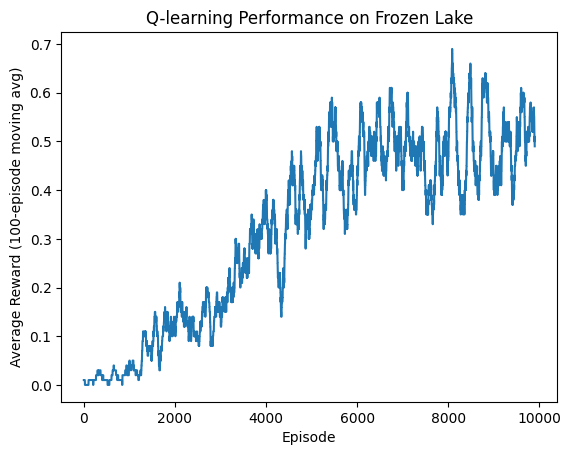

Learned Q-table:
[[0.17132765 0.16826137 0.16905793 0.16829187]
 [0.10413253 0.07147333 0.08951473 0.16167207]
 [0.15922736 0.12746615 0.1235076  0.11708801]
 [0.06150733 0.09532916 0.07785118 0.12389878]
 [0.1880128  0.16428504 0.17230546 0.12422735]
 [0.         0.         0.         0.        ]
 [0.13561352 0.14807888 0.17932097 0.03055493]
 [0.         0.         0.         0.        ]
 [0.15665576 0.20180357 0.20556264 0.22581222]
 [0.24664999 0.3385543  0.28962833 0.1536614 ]
 [0.43075333 0.27131905 0.24295199 0.14900697]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18870702 0.34744202 0.48650817 0.35177079]
 [0.52130519 0.60908765 0.74930557 0.61236627]
 [0.         0.         0.         0.        ]]



Optimal state values from Value Iteration:
[0.18046404 0.15475089 0.15347326 0.13254421 0.20896091 0.
 0.17642894 0.         0.27045289 0.37464883 0.40367096 0.
 0.         0.50897814 0.72367275 0.        ]
State | Max Q-Value 

In [6]:
# Plot learning curve
plt.plot(np.convolve(rewards_per_episode_Q, np.ones(100)/100, mode='valid'))
plt.xlabel("Episode")
plt.ylabel("Average Reward (100-episode moving avg)")
plt.title("Q-learning Performance on Frozen Lake")
plt.show()

# Display learned Q-table
print("Learned Q-table:")
print(Q)

# Value Iteration to find optimal utilities
V = np.zeros(n_states)
threshold = 1e-6
delta = float("inf")
env_unwrapped = env.unwrapped  # Get the raw environment

while delta > threshold:
    delta = 0
    for state in range(n_states):
        v = V[state]
        V[state] = max(sum(prob * (reward + gamma * V[next_state])
                          for prob, next_state, reward, _ in env_unwrapped.P[state][action])
                       for action in range(n_actions))
        delta = max(delta, abs(v - V[state]))

# Display optimal utility values
print("\n\n\nOptimal state values from Value Iteration:")
print(V)

# Compare max Q-values to optimal state values
print("State | Max Q-Value | Optimal V-Value | Difference")
print("---------------------------------------------------")
for state in range(n_states):
    max_q = np.max(Q[state, :])
    optimal_v = V[state]
    diff = abs(max_q - optimal_v)
    print(f"{state:5} | {max_q:10.4f} | {optimal_v:10.4f} | {diff:10.4f}")


In [7]:
# Extract  policy from Q-table
policy_Q = np.argmax(Q, axis=1)

# Convert to grid shape for FrozenLake (4×4)
policy_grid = policy_Q.reshape(env.unwrapped.desc.shape)

# Map action indices to arrow symbols for readability
action_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}
policy_symbols = np.vectorize(action_map.get)(policy_grid)

print("Extracted Q-Learning Policy (←, ↓, →, ↑):")
for row in policy_symbols:
    print(' '.join(row))

print(f"policy_Q: {policy_Q}")

Extracted Q-Learning Policy (←, ↓, →, ↑):
← ↑ ← ↑
← ← → ←
↑ ↓ ← ←
← → → ←
policy_Q: [0 3 0 3 0 0 2 0 3 1 0 0 0 2 2 0]



Average reward per episode using the optimal policy: 0.6815
Average number of steps per episode: 42.89


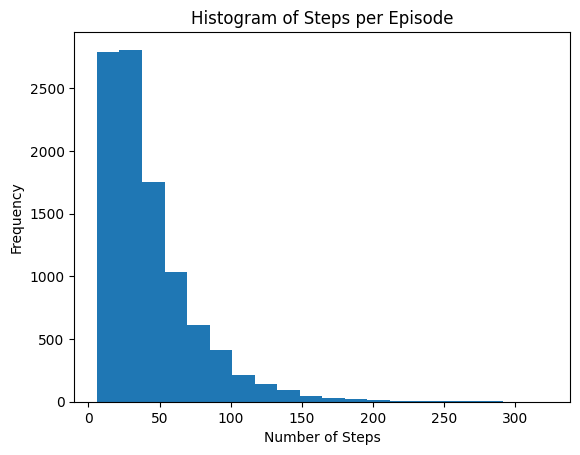

In [8]:
# Simulate average reward per episode using the optimal policy
# In the simulation of average reward, keep track of the number of steps per episode, and make a histogram of the number of steps.

num_simulations = 10000
total_rewards = []
steps_per_episode = []  # Keep track of steps per episode

for _ in range(num_simulations):
    state, _ = env.reset()
    total_reward = 0
    done = False
    steps = 0

    while not done:
        action = policy_Q[state]  # Use the extracted policy
        next_state, reward, done, truncated, _ = env.step(action)
        state = next_state
        total_reward += reward
        steps += 1

    total_rewards.append(total_reward)
    steps_per_episode.append(steps)

average_reward = np.mean(total_rewards)
average_steps = np.mean(steps_per_episode)  # Calculate average steps
print(f"\nAverage reward per episode using the optimal policy: {average_reward:.4f}")
print(f"Average number of steps per episode: {average_steps:.2f}")

# Histogram of number of steps per episode
plt.hist(steps_per_episode, bins=20)
plt.xlabel("Number of Steps")
plt.ylabel("Frequency")
plt.title("Histogram of Steps per Episode")
plt.show()


In [9]:
# SARSA implimentation
# Re-initialize epsilon and Q-table for SARSA (to avoid affecting Q-learning)
epsilon_sarsa = 1.0
Q_sarsa = np.zeros((n_states, n_actions))
rewards_sarsa = []

for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0

    # Choose initial action (epsilon-greedy)
    if np.random.rand() < epsilon_sarsa:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q_sarsa[state, :])

    while not done:
        next_state, reward, done, _, _ = env.step(action)

        # Choose next action (epsilon-greedy, on-policy)
        if np.random.rand() < epsilon_sarsa:
            next_action = env.action_space.sample()
        else:
            next_action = np.argmax(Q_sarsa[next_state, :])

        # SARSA update
        Q_sarsa[state, action] = (1 - alpha) * Q_sarsa[state, action] + alpha * (
            reward + gamma * Q_sarsa[next_state, next_action]
        )

        state, action = next_state, next_action
        total_reward += reward

    rewards_sarsa.append(total_reward)
    epsilon_sarsa = max(epsilon_min, epsilon_sarsa * epsilon_decay)

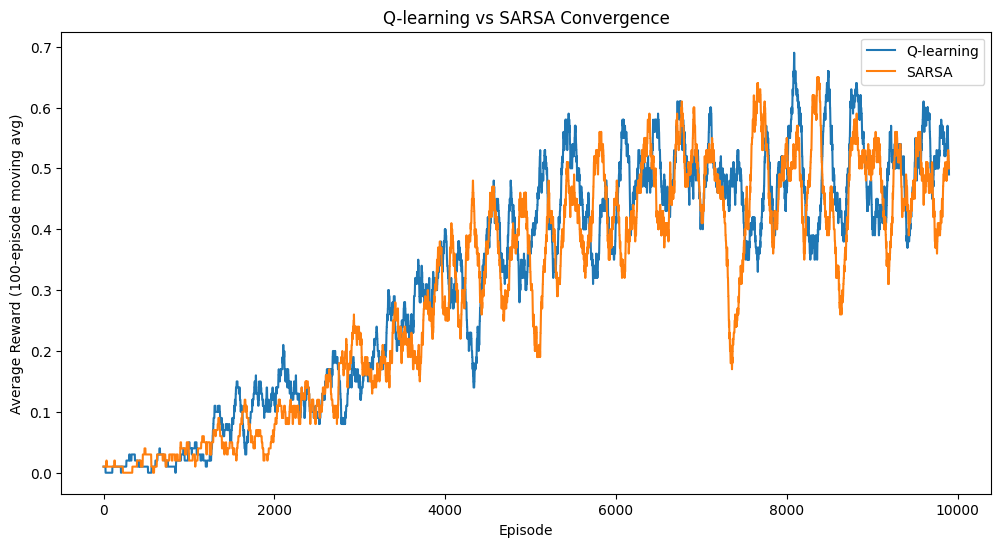

In [10]:
#Plot Comparison
plt.figure(figsize=(12, 6))
plt.plot(np.convolve(rewards_per_episode_Q, np.ones(100)/100, mode='valid'), label="Q-learning")
plt.plot(np.convolve(rewards_sarsa, np.ones(100)/100, mode='valid'), label="SARSA")
plt.xlabel("Episode")
plt.ylabel("Average Reward (100-episode moving avg)")
plt.title("Q-learning vs SARSA Convergence")
plt.legend()
plt.show()

In [11]:
#Policy Comparison
def extract_policy(Q):
    return np.argmax(Q, axis=1)

policy_ql = extract_policy(Q)  # From original Q-learning
policy_sarsa = extract_policy(Q_sarsa)

print("Q-learning Policy (←, ↓, →, ↑):")
print(np.array(['←', '↓', '→', '↑'])[policy_ql.reshape(4, 4)])
print("\nSARSA Policy (←, ↓, →, ↑):")
print(np.array(['←', '↓', '→', '↑'])[policy_sarsa.reshape(4, 4)])

Q-learning Policy (←, ↓, →, ↑):
[['←' '↑' '←' '↑']
 ['←' '←' '→' '←']
 ['↑' '↓' '←' '←']
 ['←' '→' '→' '←']]

SARSA Policy (←, ↓, →, ↑):
[['←' '↑' '←' '↑']
 ['←' '←' '→' '←']
 ['↑' '↓' '←' '←']
 ['←' '→' '↓' '←']]


In [13]:
#Policy Evaluation
def evaluate_policy(policy, n_episodes=1000):
    successes = 0
    steps = []

    for _ in range(n_episodes):
        state, _ = env.reset()
        done = False
        episode_steps = 0

        while not done:
            action = policy[state]
            state, reward, done, _, _ = env.step(action)
            episode_steps += 1

        if reward == 1.0:
            successes += 1
        steps.append(episode_steps)

    return successes / n_episodes, np.mean(steps)

ql_success, ql_steps = evaluate_policy(policy_ql)
sarsa_success, sarsa_steps = evaluate_policy(policy_sarsa)

print(f"\nQ-learning Success Rate: {ql_success:.2%} (Avg Steps: {ql_steps:.1f})")
print(f"SARSA Success Rate: {sarsa_success:.2%} (Avg Steps: {sarsa_steps:.1f})")


Q-learning Success Rate: 68.20% (Avg Steps: 40.9)
SARSA Success Rate: 80.40% (Avg Steps: 42.6)
